In [17]:


# Read the Excel file
data <- read_excel("Employee Sample Data.xlsx")

# Select the top 20 records
top_20 <- head(data, 20)

# Convert data frame to character matrix
top_20_matrix <- as.matrix(top_20)

# Convert the character matrix back to a data frame
# This step ensures that column names are preserved
top_20_df <- as.data.frame(top_20_matrix, stringsAsFactors = FALSE)

# Display the top 20 records without data types using View()
View(top_20_df)


EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NA
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NA
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NA
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NA
E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57,2017-01-24,50994,0.00,China,Chongqing,NA
E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27,2020-07-01,119746,0.10,United States,Phoenix,NA
E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29,2019-01-25,113527,0.06,United States,Austin,NA


In [18]:
# Install and load necessary packages
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
# Convert Salary to numeric
top_20$`Annual Salary` <- as.numeric(top_20$`Annual Salary`)


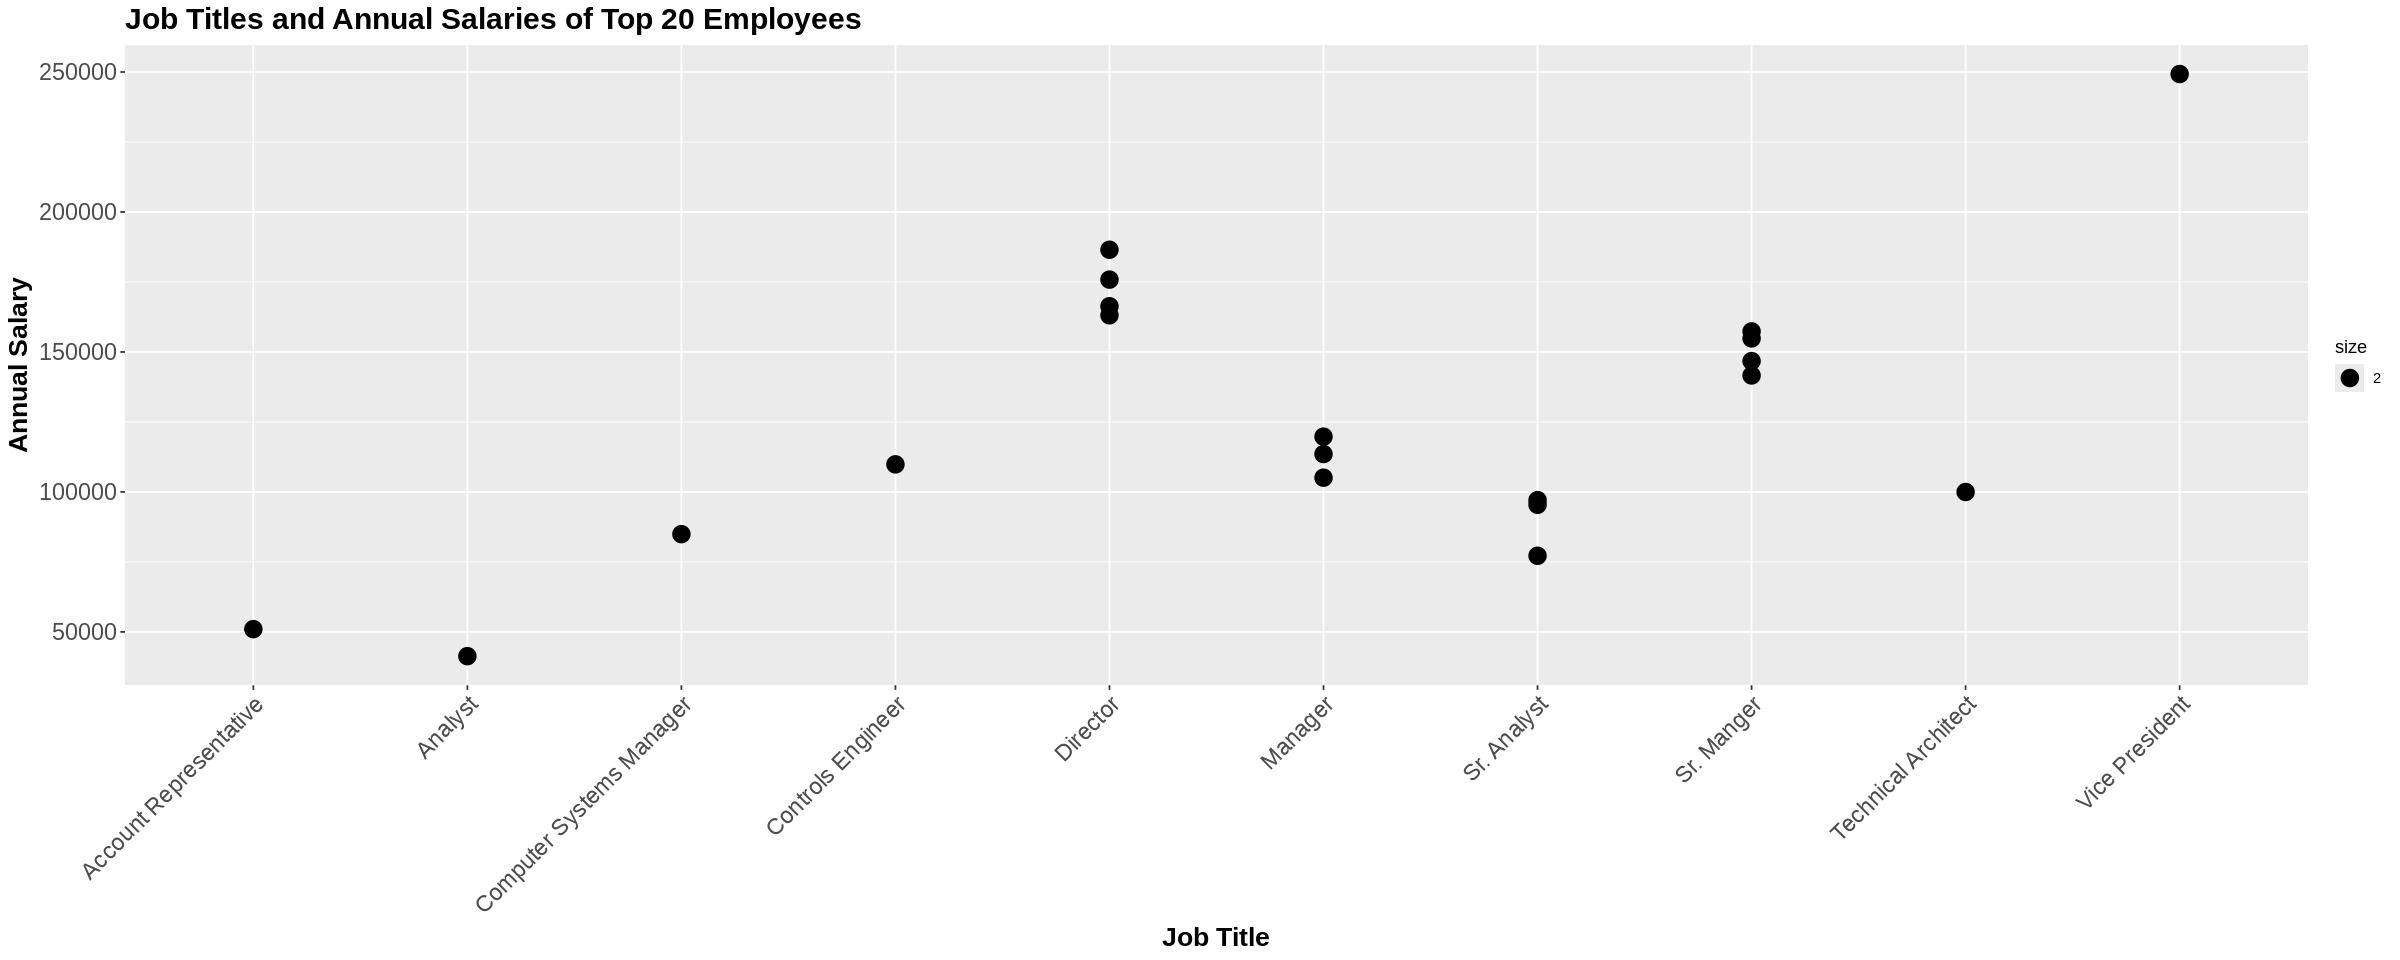

In [40]:
# Scatter plot with increased font size for title, axis labels, and axis text
ggplot(top_20, aes(x = `Job Title`, y = `Annual Salary`,cex=2)) +
  geom_point() +
  ggtitle("Job Titles and Annual Salaries of Top 20 Employees") +
  xlab("Job Title") +
  ylab("Annual Salary") +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 14),
    axis.text.y = element_text(size = 14)
  )


In [41]:
# Create a summary table
summary_table <- top_20 %>%
  group_by(Department, Gender) %>%
  summarise(Count = n())


`summarise()` has grouped output by 'Department'. You can override using the
`.groups` argument.


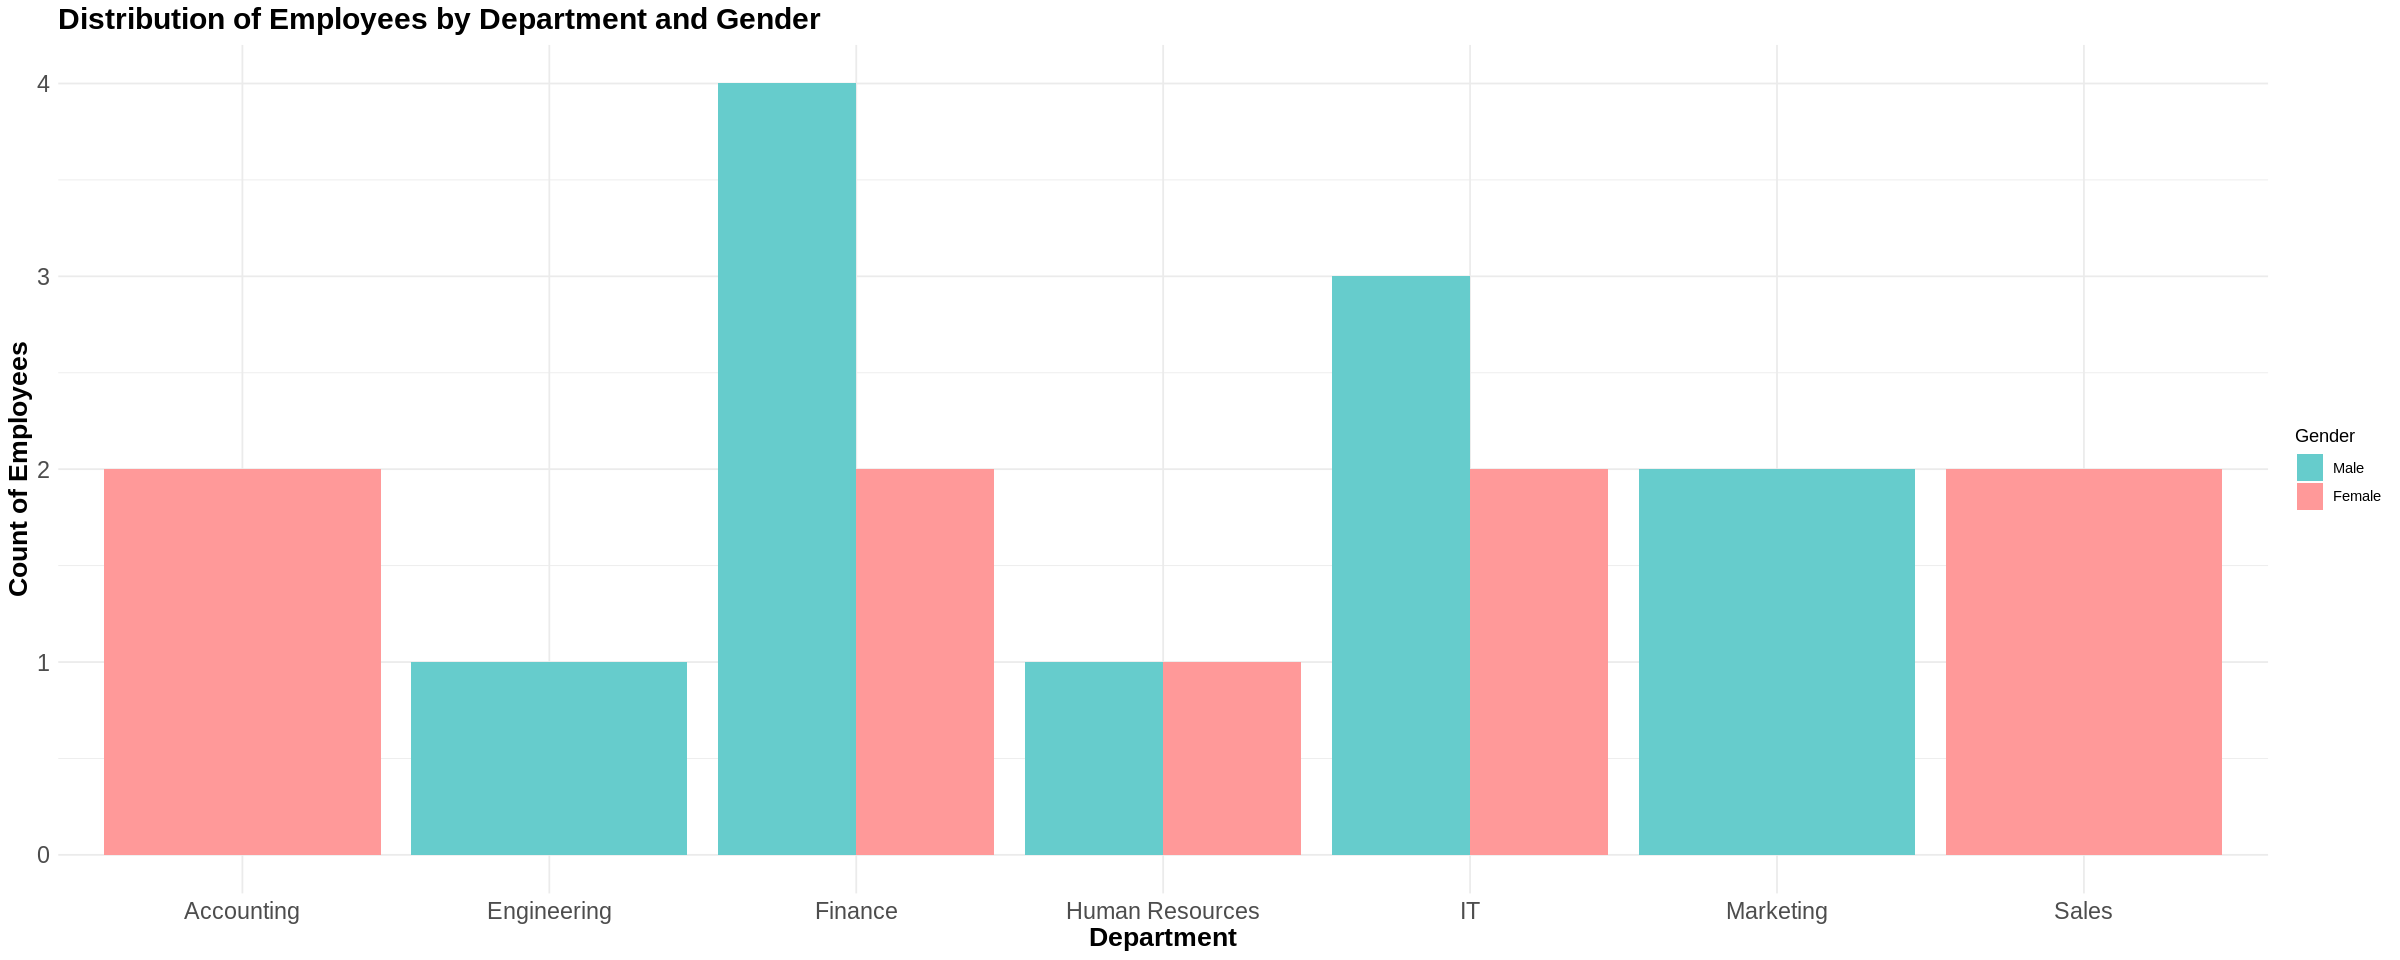

In [51]:
# Create a grouped bar chart with increased axis label size
grouped_chart <- ggplot(summary_table, aes(x = Department, y = Count, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Distribution of Employees by Department and Gender") +
  xlab("Department") +
  ylab("Count of Employees") +
  scale_fill_manual(values = c("#66CCCC", "#FF9999"), name = "Gender",
                    labels = c("Male", "Female")) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(size = 18, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)

# Display the grouped bar chart
print(grouped_chart)


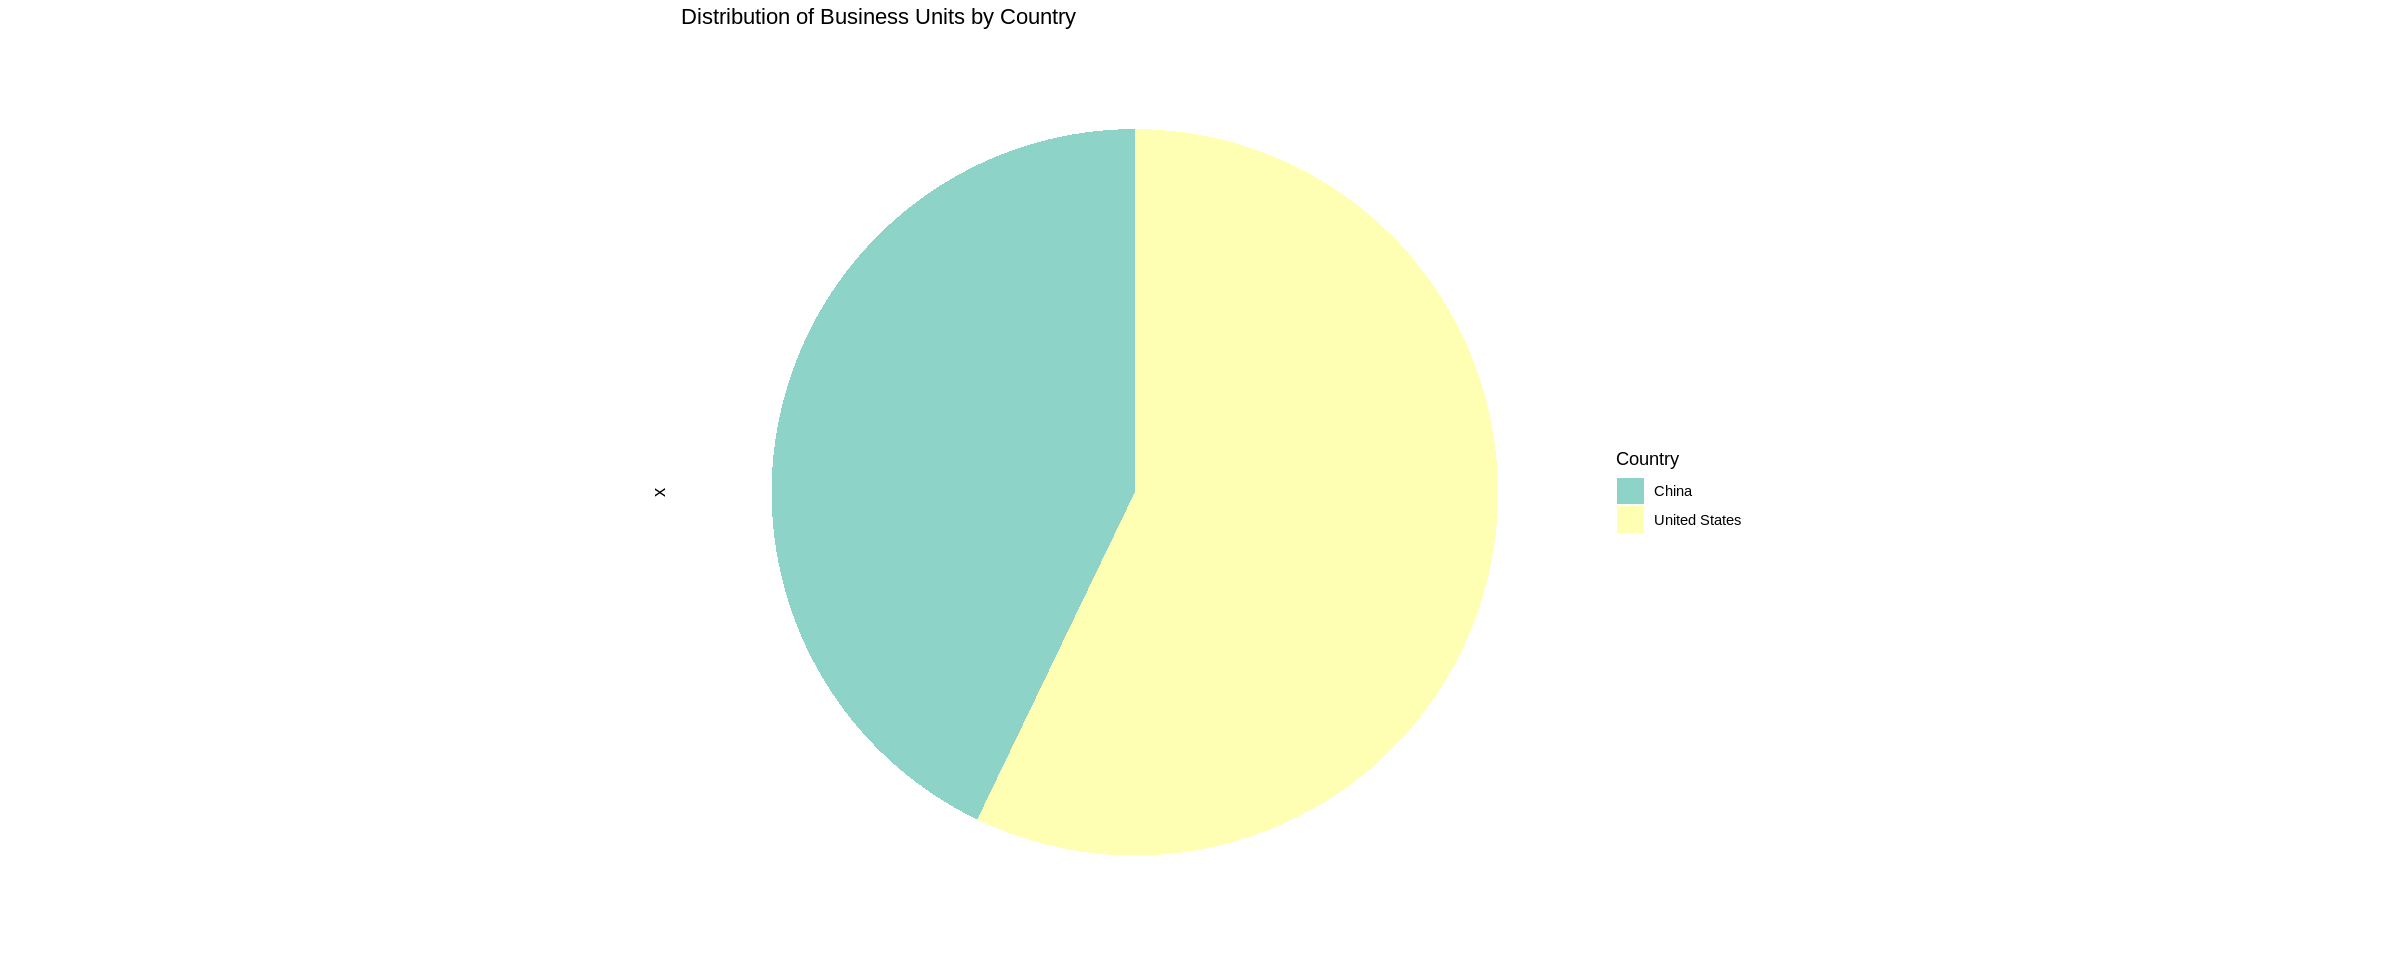

In [74]:
# Load the required libraries
library(readxl)
library(dplyr)
library(ggplot2)

employee_data <- read_excel("Employee Sample Data.xlsx")
top_20_data <- head(employee_data, 20)
country_summary <- top_20_data %>%
  group_by(Country) %>%
  summarise(`Business Units` = n_distinct(`Business Unit`),
            `Business Unit Names` = paste(unique(`Business Unit`), collapse = ", "))

country_summary <- country_summary[!is.na(country_summary$Country) & country_summary$Country != "", ]

pie_chart <- ggplot(country_summary, aes(x = "", y = `Business Units`, fill = Country)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  ggtitle("Distribution of Business Units by Country") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.title.x = element_blank(),
        panel.grid = element_blank()) +
  scale_fill_brewer(palette = "Set3")


print(pie_chart)


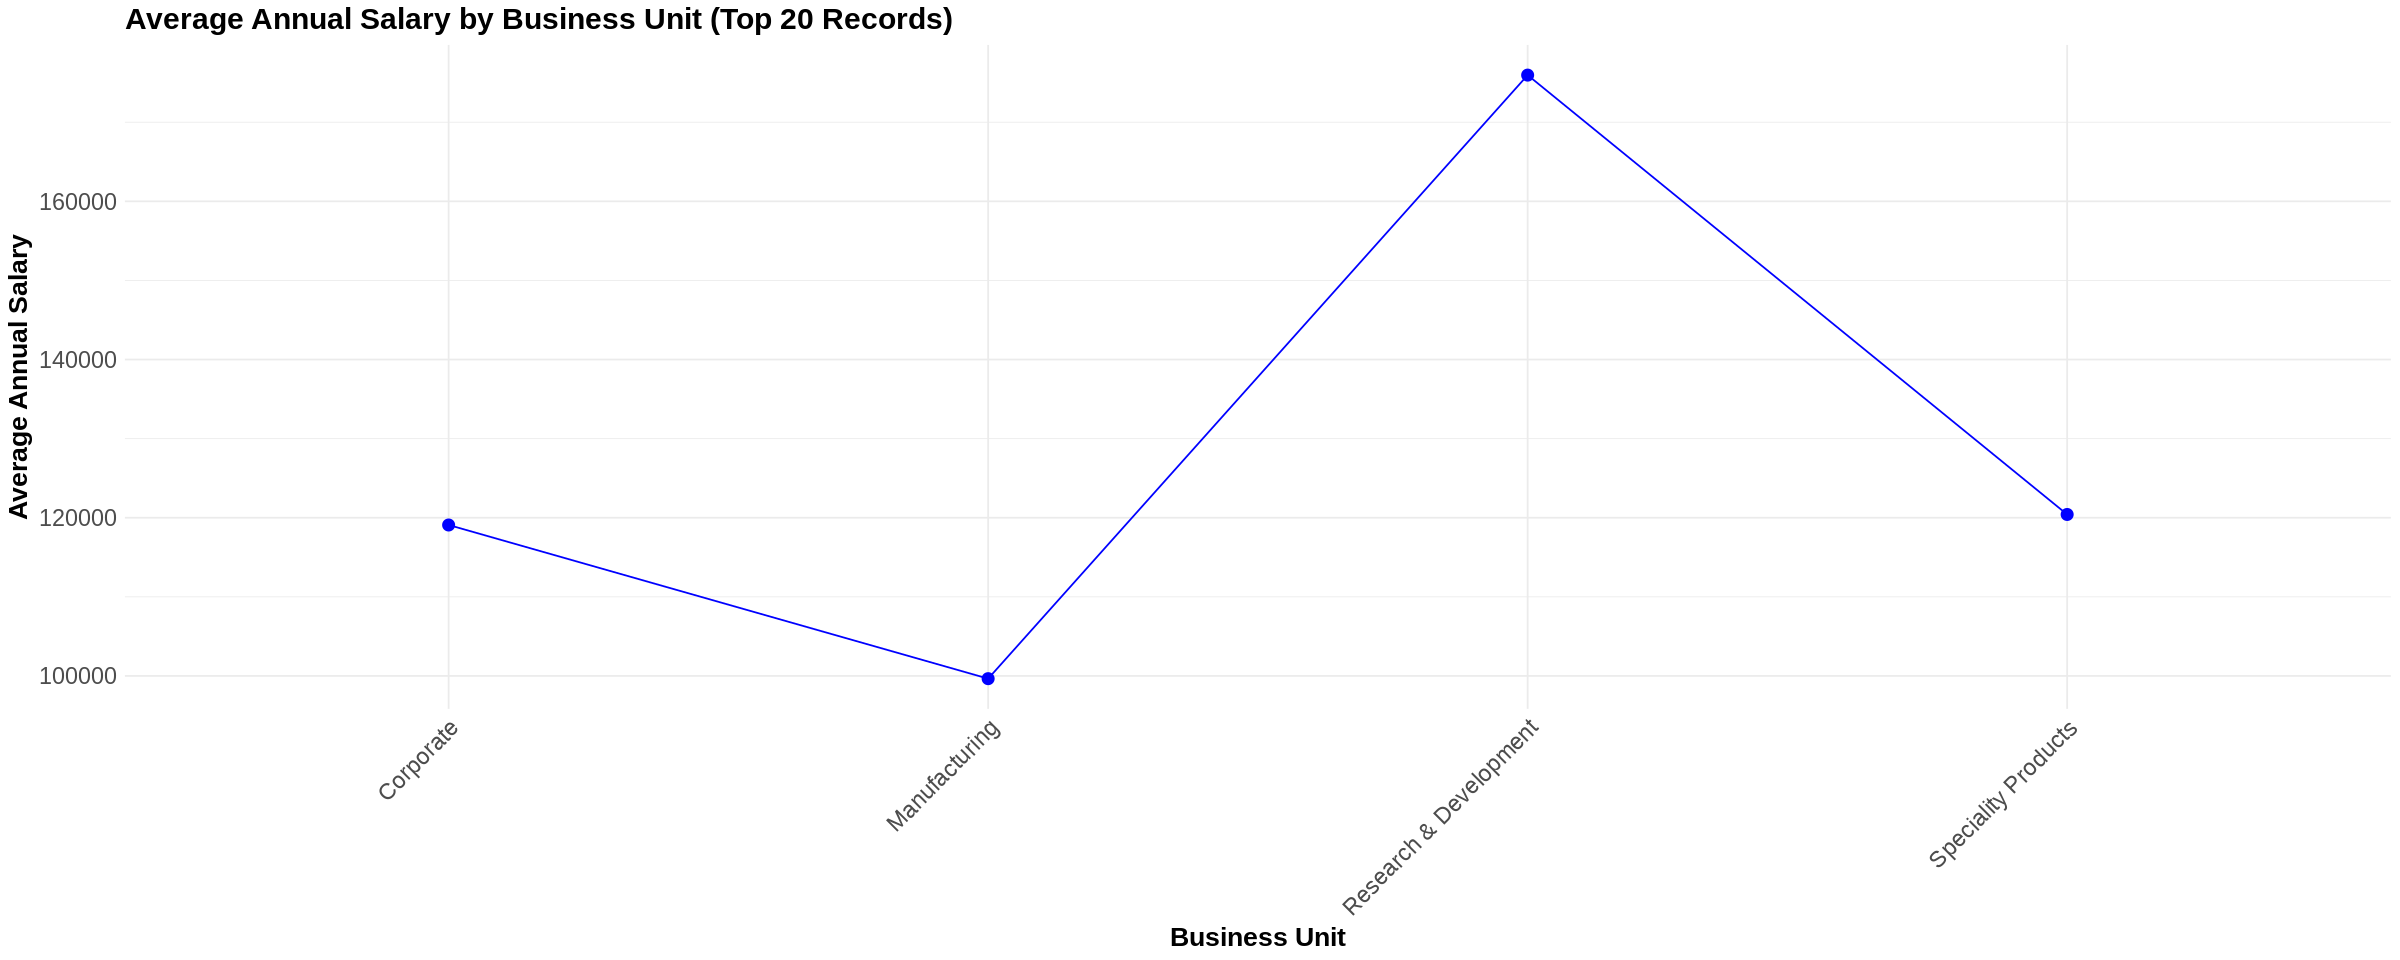

In [81]:
employee_data <- read_excel("Employee Sample Data.xlsx")

top_20_data <- head(employee_data, 20)


salary_summary <- top_20_data %>%
  group_by(`Business Unit`) %>%
  summarise(`Average Annual Salary` = mean(`Annual Salary`, na.rm = TRUE))

salary_summary <- salary_summary %>% arrange(desc(`Average Annual Salary`))
# Create line graph
line_graph <- ggplot(salary_summary, aes(x = `Business Unit`, y = `Average Annual Salary`, group = 1)) +
  geom_line(color = "blue") +
  geom_point(color = "blue", size = 3) +
  ggtitle("Average Annual Salary by Business Unit (Top 20 Records)") +
  xlab("Business Unit") +
  ylab("Average Annual Salary") +
  theme_minimal() +
  theme(

    plot.title = element_text(size = 18, face = "bold"),  # Increase font size of plot title
    axis.title.x = element_text(size = 16, face = "bold"),  # Increase font size of x-axis label
    axis.title.y = element_text(size = 16, face = "bold"),  # Increase font size of y-axis label
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 14),  # Increase font size of axis text
    axis.text.y = element_text(size = 14)  # Increase font size of y-axis text
)

print(line_graph)
